In [ ]:
mport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


for binary classiication we can use logistic regression



In [ ]:
df1=pd.get_dummies(df['Gender'])

In [ ]:
df1.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [ ]:
df2=pd.concat([df,df1],axis=1)

In [ ]:
df2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


In [ ]:
df2.drop('Gender',axis=1,inplace=True)

In [ ]:
df2.head()

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
x=df2[['User ID','Age','EstimatedSalary','Female','Male']]
y=df2[['Purchased']]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=lr.predict(xtest)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
df=pd.DataFrame()
df['actual values']=ytest.values.ravel()
df['predicted values']=y_pred

In [ ]:
df.head(10)

,actual values,predicted values
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [ ]:
y_pred_test=lr.predict(xtest)
y_pred_train=lr.predict(xtrain)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytrain,y_pred_train))
print(accuracy_score(ytest,y_pred_test))

0.765625
0.825


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred_test)
cm

array([[51,  2],
       [12, 15]])

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


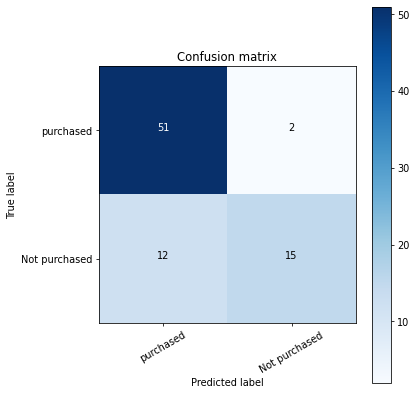

In [ ]:
classes=['purchased','Not purchased']
plt.figure(figsize=(6,6),dpi=70)
plot_confusion_matrix(cm,classes)

In [ ]:
from sklearn.metrics import precision_score
print('precision score is:',precision_score(ytest,y_pred_test))

precision score is: 0.8823529411764706


In [ ]:
from sklearn.metrics import recall_score
print('recall score is:',recall_score(ytest,y_pred_test))

recall score is: 0.5555555555555556


In [ ]:
from sklearn.metrics import f1_score
print('f1_score is:',f1_score(ytest,y_pred_test))

f1_score is: 0.6818181818181819


####jaccard score gives us ratio of intersection upon union

In [ ]:
from sklearn.metrics import jaccard_score
print('jaccard_score is:',jaccard_score(ytest,y_pred_test))

jaccard_score is: 0.5172413793103449


log_loss(lower the better)
log_score(higher the better it is form of ratio)

In [ ]:
from sklearn.metrics import log_loss
print(log_loss(ytest,y_pred_test))

6.044305859045124


##Naive Bayes Classifier 

In [ ]:
from sklearn.naive_bayes import GaussianNB
rb_classifier=GaussianNB()
rb_classifier.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred=rb_classifier.predict(xtest)
print('accuracy_score is:',accuracy_score(ytest,y_pred))

accuracy_score is: 0.8875


In [ ]:
#binary classification(logistic,naive bayes)
#multi class(knn,decision trees,ensemble models)